# Project 7

- [Report](https://docs.google.com/document/d/1pSs_wpHYjo1OZ9z9QwRaCo_tz4DWXqKcrAWFAfhqMJg/edit?usp=sharing)
- [Slides](https://docs.google.com/presentation/d/1DMBQFvKbaLcGgou52KNbLoPdnhCPeLiOwgPv8jg1U-E/edit?usp=sharing)
- [Dataset](https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset)

## Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Exploring/Cleaning Data

### Collect Utah and Colorado housing data

In [2]:
df = pd.read_csv('realtor-data.csv')
df = df[df['state'].isin(['Utah', 'Colorado'])]
df = df.dropna()
print(f'This dataset includes houses sold as recently as {pd.to_datetime(df["prev_sold_date"]).max().date()}')
# df = df.drop(df[df.status == 'sold'].index)
df = df.reset_index(drop=True)
df

This dataset includes houses sold as recently as 2022-06-10


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,886.0,for_sale,489900.0,3.0,3.0,0.05,869665.0,Centennial,Colorado,80122.0,2376.0,2002-09-09
1,79200.0,for_sale,300000.0,3.0,3.0,0.16,1218508.0,Burlington,Colorado,80807.0,1920.0,2018-05-15
2,86788.0,for_sale,96500.0,2.0,1.0,0.16,555775.0,Burlington,Colorado,80807.0,816.0,2013-02-22
3,86788.0,for_sale,129500.0,2.0,1.0,0.24,1103130.0,Burlington,Colorado,80807.0,1466.0,1990-04-04
4,86397.0,for_sale,155000.0,2.0,2.0,0.14,1383743.0,Wray,Colorado,80758.0,2126.0,2014-06-12
...,...,...,...,...,...,...,...,...,...,...,...,...
19360,33714.0,sold,409000.0,3.0,2.0,0.22,422210.0,Kanab,Utah,84741.0,1845.0,2021-12-30
19361,33714.0,sold,330000.0,3.0,2.0,0.21,422448.0,Kanab,Utah,84741.0,1254.0,2021-12-23
19362,33714.0,sold,390800.0,3.0,3.0,0.53,435240.0,Kanab,Utah,84741.0,1433.0,2021-12-03
19363,109914.0,sold,525000.0,3.0,3.0,0.99,80628.0,Toquerville,Utah,84774.0,1661.0,2021-11-12


### Ensure that the two states have similar data to each other and remove outliers

In [3]:
display(df.describe())
display(df[df.state == 'Utah'].describe())
display(df[df.state == 'Colorado'].describe())

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,19365.000000,1.936500e+04,19365.000000,19365.000000,19365.000000,1.936500e+04,19365.000000,19365.000000
mean,58091.414253,8.202878e+05,3.687529,2.911800,3.959148,9.550237e+05,81336.669455,2688.779861
std,30580.940974,1.186134e+06,1.422447,1.348171,140.980685,5.271444e+05,1552.075957,1566.834990
min,52.000000,1.200000e+04,1.000000,1.000000,0.000000,4.280000e+03,80002.000000,288.000000
25%,31049.000000,4.300000e+05,3.000000,2.000000,0.140000,4.964620e+05,80234.000000,1670.000000
50%,57414.000000,5.650000e+05,4.000000,3.000000,0.180000,9.708640e+05,80601.000000,2368.000000
75%,81492.000000,7.990000e+05,4.000000,3.000000,0.300000,1.413672e+06,81507.000000,3345.000000
max,110072.000000,4.250000e+07,96.000000,56.000000,13521.000000,1.951788e+06,84790.000000,40381.000000


,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,4146.000000,4.146000e+03,4146.000000,4146.000000,4146.000000,4.146000e+03,4146.000000,4146.000000
mean,54236.147371,8.629224e+05,4.097202,3.032562,0.434267,9.619025e+05,84208.573565,2761.357694
std,30426.854593,1.091317e+06,2.167187,1.633235,1.830078,5.251221e+05,244.433023,1813.540357
min,633.000000,1.200000e+04,1.000000,1.000000,0.010000,6.586000e+03,84003.000000,348.000000
25%,31718.000000,4.400000e+05,3.000000,2.000000,0.110000,4.808232e+05,84044.000000,1719.000000
50%,51909.000000,5.750000e+05,4.000000,3.000000,0.190000,9.926450e+05,84096.000000,2342.000000
75%,82009.000000,8.250000e+05,5.000000,4.000000,0.290000,1.415766e+06,84335.000000,3364.500000
max,110072.000000,2.995000e+07,96.000000,56.000000,60.000000,1.836385e+06,84790.000000,40381.000000


,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,15219.000000,1.521900e+04,15219.000000,15219.000000,15219.000000,1.521900e+04,15219.000000,15219.000000
mean,59141.676194,8.086732e+05,3.575925,2.878901,4.919405,9.531498e+05,80554.297786,2669.008016
std,30539.538744,1.210451e+06,1.112275,1.257435,159.013334,5.276956e+05,435.625047,1492.031617
min,52.000000,1.390000e+04,1.000000,1.000000,0.000000,4.280000e+03,80002.000000,288.000000
25%,30698.000000,4.300000e+05,3.000000,2.000000,0.140000,4.991615e+05,80209.000000,1655.500000
50%,60885.000000,5.649500e+05,3.000000,3.000000,0.180000,9.658580e+05,80524.000000,2376.000000
75%,81492.000000,7.950000e+05,4.000000,3.000000,0.300000,1.412800e+06,80816.000000,3334.000000
max,110057.000000,4.250000e+07,22.000000,24.000000,13521.000000,1.951788e+06,81658.000000,28715.000000


In [4]:
outliers = df[df.price > df.price.mean() + 2 * df.price.std()]
outliers

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
977,52952.0,for_sale,3500000.0,4.0,5.0,13.08,351105.0,Arvada,Colorado,80005.0,3340.0,2015-01-20
1001,101888.0,for_sale,3500000.0,3.0,2.0,6.35,98326.0,Arvada,Colorado,80005.0,2244.0,2020-08-24
1532,62898.0,for_sale,4500000.0,5.0,7.0,0.73,833022.0,Denver,Colorado,80209.0,7831.0,2012-03-28
1550,55730.0,for_sale,4000000.0,14.0,15.0,0.24,679685.0,Denver,Colorado,80205.0,9102.0,1992-09-09
1565,53946.0,for_sale,5495000.0,6.0,9.0,2.50,1375018.0,Greenwood Village,Colorado,80121.0,10169.0,2013-02-21
...,...,...,...,...,...,...,...,...,...,...,...,...
19308,11512.0,sold,7950000.0,6.0,8.0,0.27,562023.0,Park City,Utah,84060.0,5945.0,2022-01-10
19316,8810.0,sold,6995000.0,5.0,7.0,2.55,1658004.0,Park City,Utah,84098.0,7078.0,2022-03-25
19324,11512.0,sold,4295000.0,4.0,6.0,0.03,1744917.0,Park City,Utah,84060.0,3287.0,2021-12-15
19334,95207.0,sold,5950000.0,5.0,7.0,1.03,819021.0,Park City,Utah,84098.0,6223.0,2022-02-09


In [5]:
df = df.drop(outliers.index).reset_index()
df

,index,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,0,886.0,for_sale,489900.0,3.0,3.0,0.05,869665.0,Centennial,Colorado,80122.0,2376.0,2002-09-09
1,1,79200.0,for_sale,300000.0,3.0,3.0,0.16,1218508.0,Burlington,Colorado,80807.0,1920.0,2018-05-15
2,2,86788.0,for_sale,96500.0,2.0,1.0,0.16,555775.0,Burlington,Colorado,80807.0,816.0,2013-02-22
3,3,86788.0,for_sale,129500.0,2.0,1.0,0.24,1103130.0,Burlington,Colorado,80807.0,1466.0,1990-04-04
4,4,86397.0,for_sale,155000.0,2.0,2.0,0.14,1383743.0,Wray,Colorado,80758.0,2126.0,2014-06-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18874,19360,33714.0,sold,409000.0,3.0,2.0,0.22,422210.0,Kanab,Utah,84741.0,1845.0,2021-12-30
18875,19361,33714.0,sold,330000.0,3.0,2.0,0.21,422448.0,Kanab,Utah,84741.0,1254.0,2021-12-23
18876,19362,33714.0,sold,390800.0,3.0,3.0,0.53,435240.0,Kanab,Utah,84741.0,1433.0,2021-12-03
18877,19363,109914.0,sold,525000.0,3.0,3.0,0.99,80628.0,Toquerville,Utah,84774.0,1661.0,2021-11-12


In [6]:
display(df.describe())
display(df[df.state == 'Utah'].describe())
display(df[df.state == 'Colorado'].describe())

,index,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,18879.000000,18879.000000,1.887900e+04,18879.000000,18879.000000,18879.000000,1.887900e+04,18879.000000,18879.000000
mean,9685.005827,58222.154987,6.846318e+05,3.642672,2.823931,2.471926,9.540606e+05,81324.800148,2584.494941
std,5608.577658,30518.984443,4.517542e+05,1.157468,1.119200,99.348325,5.267403e+05,1549.296920,1288.931772
min,0.000000,52.000000,1.200000e+04,1.000000,1.000000,0.000000,4.280000e+03,80002.000000,288.000000
25%,4794.500000,31669.000000,4.299000e+05,3.000000,2.000000,0.130000,4.954415e+05,80233.000000,1652.500000
50%,9682.000000,57985.000000,5.549000e+05,3.000000,3.000000,0.180000,9.705550e+05,80601.000000,2334.000000
75%,14571.500000,81492.000000,7.750000e+05,4.000000,3.000000,0.280000,1.412160e+06,81504.000000,3257.000000
max,19364.000000,110072.000000,3.190000e+06,15.000000,18.000000,13485.000000,1.951788e+06,84790.000000,14340.000000


,index,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,4001.000000,4001.000000,4.001000e+03,4001.000000,4001.000000,4001.000000,4.001000e+03,4001.000000,4001.000000
mean,13567.872032,54356.514871,7.021672e+05,4.014996,2.895776,0.347066,9.601808e+05,84212.600600,2599.429393
std,1721.687735,30181.636382,4.530926e+05,1.375055,1.139686,1.056986,5.251880e+05,246.833121,1292.602033
min,11303.000000,633.000000,1.200000e+04,1.000000,1.000000,0.010000,1.068400e+04,84003.000000,348.000000
25%,12336.000000,32338.000000,4.350000e+05,3.000000,2.000000,0.100000,4.798550e+05,84044.000000,1693.000000
50%,13373.000000,51909.000000,5.599000e+05,4.000000,3.000000,0.190000,9.933020e+05,84096.000000,2297.000000
75%,14395.000000,82009.000000,7.825000e+05,5.000000,3.000000,0.280000,1.412427e+06,84341.000000,3242.000000
max,19364.000000,110072.000000,3.150000e+06,15.000000,18.000000,25.000000,1.836385e+06,84790.000000,14340.000000


,index,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,14878.000000,14878.000000,1.487800e+04,14878.000000,14878.000000,14878.000000,1.487800e+04,14878.000000,14878.000000
mean,8640.823296,59261.705068,6.799161e+05,3.542546,2.804611,3.043345,9.524147e+05,80548.211252,2580.478761
std,5828.708299,30526.664224,4.512927e+05,1.069745,1.112874,111.904856,5.271624e+05,428.442749,1287.956964
min,0.000000,52.000000,1.390000e+04,1.000000,1.000000,0.000000,4.280000e+03,80002.000000,288.000000
25%,3756.250000,31280.000000,4.275000e+05,3.000000,2.000000,0.140000,4.985712e+05,80209.000000,1640.000000
50%,7675.500000,61252.000000,5.500000e+05,3.000000,3.000000,0.180000,9.656440e+05,80524.000000,2344.000000
75%,15367.750000,81492.000000,7.749000e+05,4.000000,3.000000,0.280000,1.412048e+06,80808.000000,3258.000000
max,19107.000000,110057.000000,3.190000e+06,11.000000,12.000000,13485.000000,1.951788e+06,81658.000000,12684.000000


Text(0.5, 9.444444444444459, 'Price ($)')

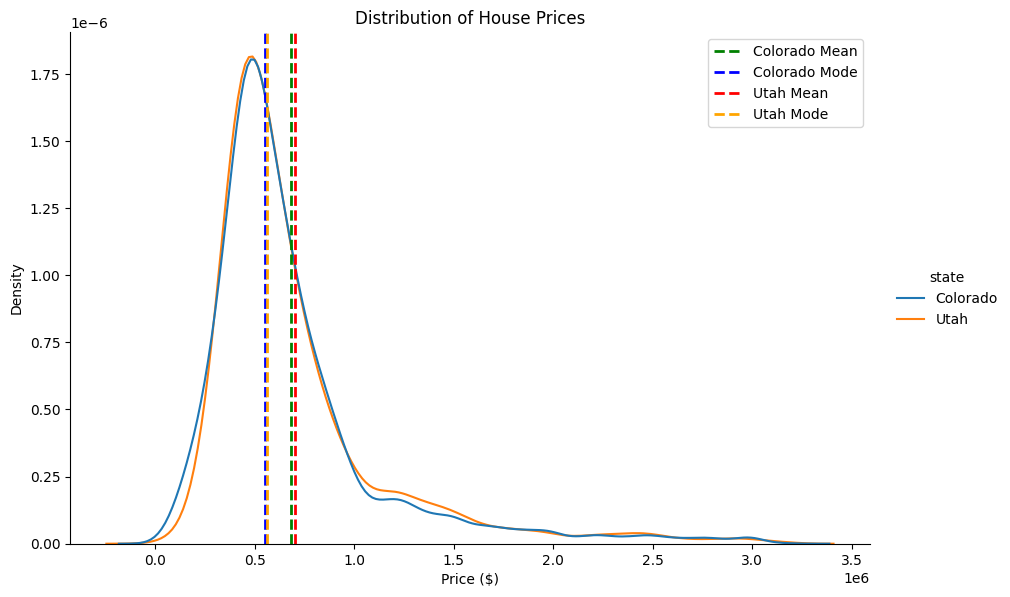

In [7]:
sns.displot(data=df, x='price', hue='state', kind='kde', common_norm=False, height=6, aspect=1.5)
plt.axvline(df[df.state == 'Colorado'].price.mean(), color='green', linestyle='dashed', linewidth=2, label='Colorado Mean')
plt.axvline(df[df.state == 'Colorado'].price.median(), color='blue', linestyle='dashed', linewidth=2, label='Colorado Mode')
plt.axvline(df[df.state == 'Utah'].price.mean(), color='red', linestyle='dashed', linewidth=2, label='Utah Mean')
plt.axvline(df[df.state == 'Utah'].price.median(), color='orange', linestyle='dashed', linewidth=2, label='Utah Mode')
plt.legend()
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')

Text(0.5, 9.444444444444459, 'Price ($)')

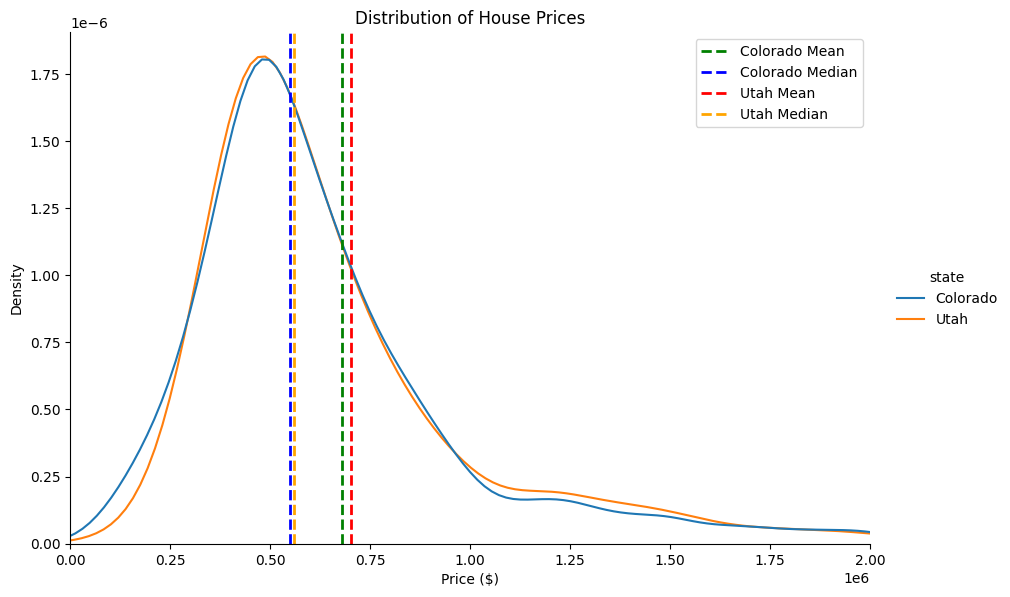

In [37]:
sns.displot(data=df, x='price', hue='state', kind='kde', common_norm=False, height=6, aspect=1.5)
plt.axvline(df[df.state == 'Colorado'].price.mean(), color='green', linestyle='dashed', linewidth=2, label='Colorado Mean')
plt.axvline(df[df.state == 'Colorado'].price.median(), color='blue', linestyle='dashed', linewidth=2, label='Colorado Median')
plt.axvline(df[df.state == 'Utah'].price.mean(), color='red', linestyle='dashed', linewidth=2, label='Utah Mean')
plt.axvline(df[df.state == 'Utah'].price.median(), color='orange', linestyle='dashed', linewidth=2, label='Utah Median')
plt.legend()
plt.xlim((0, 2000000))
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')

### Prepare the data for prediction

In [9]:
df['price_range'] = pd.qcut(df['price'], 4)
df['price_range_encoded'] = pd.qcut(df['price'], 4, labels=False)
df

,index,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,price_range,price_range_encoded
0,0,886.0,for_sale,489900.0,3.0,3.0,0.05,869665.0,Centennial,Colorado,80122.0,2376.0,2002-09-09,"(429900.0, 554900.0]",1
1,1,79200.0,for_sale,300000.0,3.0,3.0,0.16,1218508.0,Burlington,Colorado,80807.0,1920.0,2018-05-15,"(11999.999, 429900.0]",0
2,2,86788.0,for_sale,96500.0,2.0,1.0,0.16,555775.0,Burlington,Colorado,80807.0,816.0,2013-02-22,"(11999.999, 429900.0]",0
3,3,86788.0,for_sale,129500.0,2.0,1.0,0.24,1103130.0,Burlington,Colorado,80807.0,1466.0,1990-04-04,"(11999.999, 429900.0]",0
4,4,86397.0,for_sale,155000.0,2.0,2.0,0.14,1383743.0,Wray,Colorado,80758.0,2126.0,2014-06-12,"(11999.999, 429900.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18874,19360,33714.0,sold,409000.0,3.0,2.0,0.22,422210.0,Kanab,Utah,84741.0,1845.0,2021-12-30,"(11999.999, 429900.0]",0
18875,19361,33714.0,sold,330000.0,3.0,2.0,0.21,422448.0,Kanab,Utah,84741.0,1254.0,2021-12-23,"(11999.999, 429900.0]",0
18876,19362,33714.0,sold,390800.0,3.0,3.0,0.53,435240.0,Kanab,Utah,84741.0,1433.0,2021-12-03,"(11999.999, 429900.0]",0
18877,19363,109914.0,sold,525000.0,3.0,3.0,0.99,80628.0,Toquerville,Utah,84774.0,1661.0,2021-11-12,"(429900.0, 554900.0]",1


In [10]:
df['price_range'].unique()

[(429900.0, 554900.0], (11999.999, 429900.0], (554900.0, 775000.0], (775000.0, 3190000.0]]
Categories (4, interval[float64, right]): [(11999.999, 429900.0] < (429900.0, 554900.0] < (554900.0, 775000.0] < (775000.0, 3190000.0]]

In [11]:
df['utah'] = df.apply(lambda row: 1 if row.state == 'Utah' else 0, axis=1)
df

,index,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,price_range,price_range_encoded,utah
0,0,886.0,for_sale,489900.0,3.0,3.0,0.05,869665.0,Centennial,Colorado,80122.0,2376.0,2002-09-09,"(429900.0, 554900.0]",1,0
1,1,79200.0,for_sale,300000.0,3.0,3.0,0.16,1218508.0,Burlington,Colorado,80807.0,1920.0,2018-05-15,"(11999.999, 429900.0]",0,0
2,2,86788.0,for_sale,96500.0,2.0,1.0,0.16,555775.0,Burlington,Colorado,80807.0,816.0,2013-02-22,"(11999.999, 429900.0]",0,0
3,3,86788.0,for_sale,129500.0,2.0,1.0,0.24,1103130.0,Burlington,Colorado,80807.0,1466.0,1990-04-04,"(11999.999, 429900.0]",0,0
4,4,86397.0,for_sale,155000.0,2.0,2.0,0.14,1383743.0,Wray,Colorado,80758.0,2126.0,2014-06-12,"(11999.999, 429900.0]",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18874,19360,33714.0,sold,409000.0,3.0,2.0,0.22,422210.0,Kanab,Utah,84741.0,1845.0,2021-12-30,"(11999.999, 429900.0]",0,1
18875,19361,33714.0,sold,330000.0,3.0,2.0,0.21,422448.0,Kanab,Utah,84741.0,1254.0,2021-12-23,"(11999.999, 429900.0]",0,1
18876,19362,33714.0,sold,390800.0,3.0,3.0,0.53,435240.0,Kanab,Utah,84741.0,1433.0,2021-12-03,"(11999.999, 429900.0]",0,1
18877,19363,109914.0,sold,525000.0,3.0,3.0,0.99,80628.0,Toquerville,Utah,84774.0,1661.0,2021-11-12,"(429900.0, 554900.0]",1,1


In [12]:
# df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'])
# df['days_since_last_sale'] = (pd.Timestamp.today() - df['prev_sold_date']).dt.days
# df

## Decision Trees

### Depth of 3

#### Training on whole dataset

In [13]:
# create a list of feature columns
feature_cols = ['bed', 'bath', 'acre_lot', 'house_size', 'utah',]# 'days_since_last_sale']

# define X and y
X = df[feature_cols]
y = df.price_range_encoded

# fit a classification tree on all data
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X.values, y)

dot = tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                    class_names=['0', '1', '2', '3'], filled = True)

# output dot code to copy/paste into https://dreampuf.github.io/GraphvizOnline
print(dot)

y_pred = treeclf.predict(X)

p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=[0, 1, 2, 3])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="house_size <= 3016.5\ngini = 0.75\nsamples = 18879\nvalue = [4729.0, 4713.0, 4823.0, 4614.0]\nclass = 2", fillcolor="#fefeff"] ;
1 [label="house_size <= 1613.5\ngini = 0.713\nsamples = 13114\nvalue = [4621, 4247, 2817, 1429]\nclass = 0", fillcolor="#fefaf7"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="house_size <= 1147.5\ngini = 0.529\nsamples = 4430\nvalue = [2835, 1011, 356, 228]\nclass = 0", fillcolor="#f1bc95"] ;
1 -> 2 ;
3 [label="gini = 0.417\nsamples = 1615\nvalue = [1204, 236, 107, 68]\nclass = 0", fillcolor="#eda774"] ;
2 -> 3 ;
4 [label="gini = 0.577\nsamples = 2815\nvalue = [1631, 775, 249, 160]\nclass = 0", fillcolor="#f4caac"] ;
2 -> 4 ;
5 [label="house_size <= 2165.5\ngini = 0.719\nsamples = 8684\nvalue = [1786, 3236, 2461, 1201]\nclass = 1", fillcolor="#e8fce6"] ;
1 -> 5 ;
6 [label="gini = 0.695\nsamples = 3922\nval

c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


'precision = [0.63995485 0.40770015 0.42237351 0.79545455]'

'recall = [0.59949249 0.33927435 0.65602322 0.52340702]'

'f-score = [0.61906322 0.37035321 0.51388663 0.63137255]'

,feature,importance
0,bed,0.000000
1,bath,0.000000
2,acre_lot,0.042451
3,house_size,0.957549
4,utah,0.000000


#### Monte Carlo cross-validation

In [14]:
# create a list of feature columns
feature_cols = ['bed', 'bath', 'acre_lot', 'house_size', 'utah',]# 'days_since_last_sale']

# define X and y
X = df[feature_cols]
y = df.price_range_encoded

scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    # fit a classification tree on all data
    treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
    treeclf.fit(X_train, y_train)

    y_pred = treeclf.predict(X_test)

    p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1, 2, 3])
    scores['p'].append(p)
    scores['r'].append(r)
    scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

'precision = [0.64299864 0.38455409 0.4892517  0.78176006]'

'recall = [0.59940049 0.53125402 0.45741699 0.5266924 ]'

'f-score = [0.62034821 0.43348996 0.44932473 0.62838386]'

### Depth of 5

#### Training on whole dataset

In [15]:
# create a list of feature columns
feature_cols = ['bed', 'bath', 'acre_lot', 'house_size', 'utah',]# 'days_since_last_sale']

# define X and y
X = df[feature_cols]
y = df.price_range_encoded

# fit a classification tree on all data
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclf.fit(X.values, y)

dot = tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                    class_names=['0', '1', '2', '3'], filled = True)

# output dot code to copy/paste into https://dreampuf.github.io/GraphvizOnline
print(dot)

y_pred = treeclf.predict(X)

p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=[0, 1, 2, 3])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="house_size <= 3016.5\ngini = 0.75\nsamples = 18879\nvalue = [4729.0, 4713.0, 4823.0, 4614.0]\nclass = 2", fillcolor="#fefeff"] ;
1 [label="house_size <= 1613.5\ngini = 0.713\nsamples = 13114\nvalue = [4621, 4247, 2817, 1429]\nclass = 0", fillcolor="#fefaf7"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="house_size <= 1147.5\ngini = 0.529\nsamples = 4430\nvalue = [2835, 1011, 356, 228]\nclass = 0", fillcolor="#f1bc95"] ;
1 -> 2 ;
3 [label="acre_lot <= 0.765\ngini = 0.417\nsamples = 1615\nvalue = [1204, 236, 107, 68]\nclass = 0", fillcolor="#eda774"] ;
2 -> 3 ;
4 [label="bath <= 1.5\ngini = 0.384\nsamples = 1456\nvalue = [1119, 213, 84, 40]\nclass = 0", fillcolor="#eca36f"] ;
3 -> 4 ;
5 [label="gini = 0.337\nsamples = 951\nvalue = [760, 145, 32, 14]\nclass = 0", fillcolor="#eb9f68"] ;
4 -> 5 ;
6 [label="gini = 0.463\nsamples = 505\nval

c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


'precision = [0.60908548 0.4342073  0.46780151 0.75844595]'

'recall = [0.64643688 0.37598133 0.60398092 0.58387516]'

'f-score = [0.62720558 0.40300205 0.52723982 0.65980896]'

,feature,importance
0,bed,0.000000
1,bath,0.070395
2,acre_lot,0.083517
3,house_size,0.846088
4,utah,0.000000


#### Monte Carlo cross-validation

In [16]:
# create a list of feature columns
feature_cols = ['bed', 'bath', 'acre_lot', 'house_size', 'utah',]# 'days_since_last_sale']

# define X and y
X = df[feature_cols]
y = df.price_range_encoded

scores = {'p': [], 'r': [], 'f': []}
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    # fit a classification tree on all data
    treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
    treeclf.fit(X_train, y_train)

    y_pred = treeclf.predict(X_test)

    p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1, 2, 3])
    scores['p'].append(p)
    scores['r'].append(r)
    scores['f'].append(f)

avgP = 0
for pre in scores['p']:
    avgP += pre
avgP /= len(scores['p'])

avgR = 0
for re in scores['r']:
    avgR += re
avgR /= len(scores['r'])

avgF = 0
for f in scores['f']:
    avgF += f
avgF /= len(scores['f'])

display('precision = {}'.format(avgP))
display('recall = {}'.format(avgR))
display('f-score = {}'.format(avgF))

'precision = [0.61334778 0.42716979 0.46645979 0.74694335]'

'recall = [0.64183743 0.4151017  0.55344737 0.57723687]'

'f-score = [0.62708797 0.41762383 0.50259782 0.65043636]'

### Testing the most important feature only

In [17]:
# create a list of feature columns
feature_cols = ['house_size']

# define X and y
X = df[feature_cols]
y = df.price_range_encoded

# fit a classification tree on all data
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclf.fit(X.values, y)

dot = tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                    class_names=['0', '1', '2', '3'], filled = True)

# output dot code to copy/paste into https://dreampuf.github.io/GraphvizOnline
print(dot)

y_pred = treeclf.predict(X)

p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=[0, 1, 2, 3])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="house_size <= 3016.5\ngini = 0.75\nsamples = 18879\nvalue = [4729.0, 4713.0, 4823.0, 4614.0]\nclass = 2", fillcolor="#fefeff"] ;
1 [label="house_size <= 1613.5\ngini = 0.713\nsamples = 13114\nvalue = [4621, 4247, 2817, 1429]\nclass = 0", fillcolor="#fefaf7"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="house_size <= 1147.5\ngini = 0.529\nsamples = 4430\nvalue = [2835, 1011, 356, 228]\nclass = 0", fillcolor="#f1bc95"] ;
1 -> 2 ;
3 [label="house_size <= 704.5\ngini = 0.417\nsamples = 1615\nvalue = [1204, 236, 107, 68]\nclass = 0", fillcolor="#eda774"] ;
2 -> 3 ;
4 [label="house_size <= 551.0\ngini = 0.21\nsamples = 165\nvalue = [146.0, 13.0, 6.0, 0.0]\nclass = 0", fillcolor="#e89152"] ;
3 -> 4 ;
5 [label="gini = 0.043\nsamples = 45\nvalue = [44, 0, 1, 0]\nclass = 0", fillcolor="#e6843d"] ;
4 -> 5 ;
6 [label="gini = 0.264\nsamples = 12

c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


'precision = [0.63995485 0.39227952 0.45840673 0.79325197]'

'recall = [0.59949249 0.54551241 0.48558988 0.47897703]'

'f-score = [0.61906322 0.45637703 0.47160693 0.5972973 ]'

In [18]:
# create a list of feature columns
feature_cols = ['house_size']

# define X and y
X = df[feature_cols]
y = df.price_range_encoded

# fit a classification tree on all data
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X.values, y)

dot = tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                    class_names=['0', '1', '2', '3'], filled = True)

# output dot code to copy/paste into https://dreampuf.github.io/GraphvizOnline
print(dot)

y_pred = treeclf.predict(X)

p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=[0, 1, 2, 3])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="house_size <= 3016.5\ngini = 0.75\nsamples = 18879\nvalue = [4729.0, 4713.0, 4823.0, 4614.0]\nclass = 2", fillcolor="#fefeff"] ;
1 [label="house_size <= 1613.5\ngini = 0.713\nsamples = 13114\nvalue = [4621, 4247, 2817, 1429]\nclass = 0", fillcolor="#fefaf7"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="house_size <= 1147.5\ngini = 0.529\nsamples = 4430\nvalue = [2835, 1011, 356, 228]\nclass = 0", fillcolor="#f1bc95"] ;
1 -> 2 ;
3 [label="house_size <= 704.5\ngini = 0.417\nsamples = 1615\nvalue = [1204, 236, 107, 68]\nclass = 0", fillcolor="#eda774"] ;
2 -> 3 ;
4 [label="gini = 0.21\nsamples = 165\nvalue = [146.0, 13.0, 6.0, 0.0]\nclass = 0", fillcolor="#e89152"] ;
3 -> 4 ;
5 [label="gini = 0.437\nsamples = 1450\nvalue = [1058.0, 223.0, 101.0, 68.0]\nclass = 0", fillcolor="#eda978"] ;
3 -> 5 ;
6 [label="house_size <= 1450.5\ngini = 0

c:\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


'precision = [0.63995485 0.39227952 0.45678773 0.79497451]'

'recall = [0.59949249 0.54551241 0.48766328 0.47312527]'

'f-score = [0.61906322 0.45637703 0.47172082 0.59320652]'

### Finding the best depth

In [19]:
fScores = {
    'depth': [],
    '0': [],
    '1': [],
    '2': [],
    '3': [],
    'avg': []
}
for i in range(2, 21):   
    # create a list of feature columns
    feature_cols = ['bed', 'bath', 'acre_lot', 'house_size', 'utah',]# 'days_since_last_sale']

    # define X and y
    X = df[feature_cols]
    y = df.price_range_encoded

    scores = {'p': [], 'r': [], 'f': []}
    for _ in range(30):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

        # fit a classification tree on all data
        treeclf = DecisionTreeClassifier(max_depth=i, random_state=1)
        treeclf.fit(X_train, y_train)

        y_pred = treeclf.predict(X_test)

        p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1, 2, 3])
        scores['f'].append(f)

    avgF = 0
    for f in scores['f']:
        avgF += f
    avgF /= len(scores['f'])

    fScores['depth'].append(i)
    fScores['0'].append(avgF[0])
    fScores['1'].append(avgF[1])
    fScores['2'].append(avgF[2])
    fScores['3'].append(avgF[3])
    fScores['avg'].append((avgF[0] + avgF[1] + avgF[2] + avgF[3]) / 4)

display(fScores)

{'depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 '0': [0.6173873288792929,
  0.6185213097994693,
  0.6193146295840619,
  0.6279858823715624,
  0.6270283658811181,
  0.6267993106898139,
  0.6238178135917775,
  0.6202766636983011,
  0.6176531041960961,
  0.6134374833725615,
  0.607466503725724,
  0.5986987337534199,
  0.5957199261537238,
  0.5859489119639609,
  0.5838619884263746,
  0.5783345360996162,
  0.5758789015465282,
  0.5750967099071527,
  0.5678931969789982],
 '1': [0.46897481489978277,
  0.41033005875153705,
  0.47784825830820965,
  0.41961444819516525,
  0.47223945145468627,
  0.4886898121348585,
  0.4859784449023194,
  0.48094710176170163,
  0.4774377764175638,
  0.46865221321866374,
  0.4640680566787643,
  0.46091826372394756,
  0.45350328625484015,
  0.4525694014653276,
  0.4484496069152052,
  0.440657520473225,
  0.436948375621725,
  0.43234512248725604,
  0.4316259793596376],
 '2': [0.4222664717613202,
  0.47086176744998753,
  0.41418018361

In [20]:
scoresDF = pd.DataFrame(fScores)
scoresDF = pd.melt(scoresDF, id_vars='depth', value_vars=['0', '1', '2', '3', 'avg'],
                    var_name='class', value_name='fScore')
scoresDF

,depth,class,fScore
0,2,0,0.617387
1,3,0,0.618521
2,4,0,0.619315
3,5,0,0.627986
4,6,0,0.627028
...,...,...,...
90,16,avg,0.526840
91,17,avg,0.522834
92,18,avg,0.518704
93,19,avg,0.517054


In [21]:
maxAvgScore = scoresDF[scoresDF['class'] == 'avg']['fScore'].max()
display(maxAvgScore)
bestDepth = scoresDF[scoresDF['class'] == 'avg'][scoresDF['fScore'] == maxAvgScore].depth.tolist()[0]
display(bestDepth)
index = fScores['depth'].index(7)
bestDepthScores = {}
for key, value in fScores.items():
    if not key in ['depth', 'avg']:
        bestDepthScores[key] = value[index]
bestDepthScores

0.5651556029047743

C:\Users\nated\AppData\Local\Temp\ipykernel_3632\875857880.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bestDepth = scoresDF[scoresDF['class'] == 'avg'][scoresDF['fScore'] == maxAvgScore].depth.tolist()[0]


7

{'0': 0.6267993106898139,
 '1': 0.4886898121348585,
 '2': 0.47973304678006506,
 '3': 0.6654002420143595}

Text(0, 0.5, 'Average F-Score')

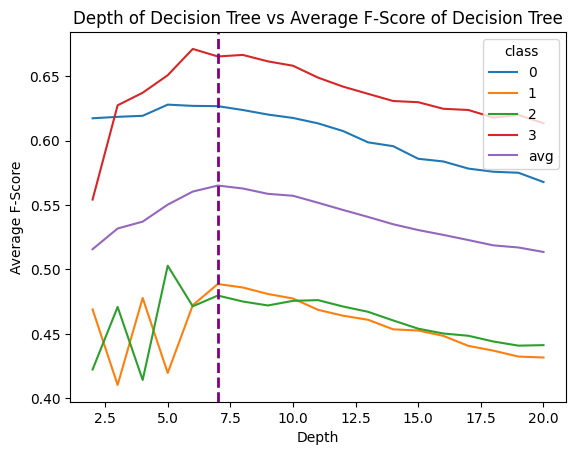

In [22]:
sns.lineplot(data=scoresDF, x='depth', y='fScore', hue='class')
plt.axvline(bestDepth, color='purple', linestyle='dashed', linewidth=2, label='Best Depth')
plt.title('Depth of Decision Tree vs Average F-Score of Decision Tree')
plt.xlabel('Depth')
plt.ylabel('Average F-Score')

It looks like a depth of 7 is the best generally.

## Neural Networks

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [24]:
display(df)
df.describe

,index,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,price_range,price_range_encoded,utah
0,0,886.0,for_sale,489900.0,3.0,3.0,0.05,869665.0,Centennial,Colorado,80122.0,2376.0,2002-09-09,"(429900.0, 554900.0]",1,0
1,1,79200.0,for_sale,300000.0,3.0,3.0,0.16,1218508.0,Burlington,Colorado,80807.0,1920.0,2018-05-15,"(11999.999, 429900.0]",0,0
2,2,86788.0,for_sale,96500.0,2.0,1.0,0.16,555775.0,Burlington,Colorado,80807.0,816.0,2013-02-22,"(11999.999, 429900.0]",0,0
3,3,86788.0,for_sale,129500.0,2.0,1.0,0.24,1103130.0,Burlington,Colorado,80807.0,1466.0,1990-04-04,"(11999.999, 429900.0]",0,0
4,4,86397.0,for_sale,155000.0,2.0,2.0,0.14,1383743.0,Wray,Colorado,80758.0,2126.0,2014-06-12,"(11999.999, 429900.0]",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18874,19360,33714.0,sold,409000.0,3.0,2.0,0.22,422210.0,Kanab,Utah,84741.0,1845.0,2021-12-30,"(11999.999, 429900.0]",0,1
18875,19361,33714.0,sold,330000.0,3.0,2.0,0.21,422448.0,Kanab,Utah,84741.0,1254.0,2021-12-23,"(11999.999, 429900.0]",0,1
18876,19362,33714.0,sold,390800.0,3.0,3.0,0.53,435240.0,Kanab,Utah,84741.0,1433.0,2021-12-03,"(11999.999, 429900.0]",0,1
18877,19363,109914.0,sold,525000.0,3.0,3.0,0.99,80628.0,Toquerville,Utah,84774.0,1661.0,2021-11-12,"(429900.0, 554900.0]",1,1


<bound method NDFrame.describe of        index  brokered_by    status     price  bed  bath  acre_lot     street  \
0          0        886.0  for_sale  489900.0  3.0   3.0      0.05   869665.0   
1          1      79200.0  for_sale  300000.0  3.0   3.0      0.16  1218508.0   
2          2      86788.0  for_sale   96500.0  2.0   1.0      0.16   555775.0   
3          3      86788.0  for_sale  129500.0  2.0   1.0      0.24  1103130.0   
4          4      86397.0  for_sale  155000.0  2.0   2.0      0.14  1383743.0   
...      ...          ...       ...       ...  ...   ...       ...        ...   
18874  19360      33714.0      sold  409000.0  3.0   2.0      0.22   422210.0   
18875  19361      33714.0      sold  330000.0  3.0   2.0      0.21   422448.0   
18876  19362      33714.0      sold  390800.0  3.0   3.0      0.53   435240.0   
18877  19363     109914.0      sold  525000.0  3.0   3.0      0.99    80628.0   
18878  19364     109914.0      sold  345000.0  3.0   2.0      0.53   860229

In [25]:
# create a list of feature columns
feature_cols = ['bed', 'bath', 'acre_lot', 'house_size', 'utah',]# 'days_since_last_sale']
# Tried with added features 'zip_code','brokered_by', 'status', was not better. Most predictions were worst. 

# define X and y
X = df[feature_cols]
y = df.price_range_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-1.43096014,  0.15563184, -0.0238409 , -0.9411828 , -0.51795079],
       [ 1.17606941, -0.73868278, -0.02192046,  0.05274445, -0.51795079],
       [-1.43096014, -1.6329974 , -0.02288068, -0.62535545, -0.51795079],
       ...,
       [-0.56195029, -1.6329974 , -0.02305527, -1.19895365, -0.51795079],
       [-0.56195029,  0.15563184, -0.0226188 ,  0.93829956, -0.51795079],
       [ 0.30705956, -0.73868278, -0.02139671, -0.90789707, -0.51795079]])

In [27]:
# mlp = MLPClassifier(hidden_layer_sizes=(3),max_iter=500)
mlp = MLPClassifier(hidden_layer_sizes=(7, 9, 11),max_iter=50000)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(7, 9, 11), max_iter=50000)

In [28]:
predictions = mlp.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, predictions, labels=[0, 1, 2, 3])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.58395145 0.42203258 0.48224852 0.75053533]'

'recall = [0.72468619 0.45295587 0.41300676 0.61491228]'

'f-score = [0.64675131 0.43694779 0.44494995 0.67598843]'

In [29]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp.coefs_)):
    m = len(mlp.coefs_[l])
    n = len(mlp.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp.intercepts_[l]) for l,_ in enumerate(mlp.intercepts_)]))

This dataset has 5 input nodes and 4 output node(s)
There are 4 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 5x7 (5 nodes feeding into a layer of 7 nodes)
  1: 7x9 (7 nodes feeding into a layer of 9 nodes)
  2: 9x11 (9 nodes feeding into a layer of 11 nodes)
  3: 11x4 (11 nodes feeding into a layer of 4 nodes)
[array([[ 3.36029742e-01, -3.91677774e-02, -2.97429380e-01,
         5.49985706e-02,  1.03162789e-01, -5.77615314e-01,
        -9.14911687e-01],
       [ 1.93811121e-01,  4.70564283e-01, -1.63714985e-01,
         1.07070225e-01,  5.82776914e-02,  5.27043256e-01,
        -2.81157253e-01],
       [ 1.67746663e-01,  1.52884002e-01, -2.76542038e+00,
        -8.53983473e+00,  9.50053744e-01,  9.57407989e-01,
         7.52090003e-01],
       [-3.05724547e-01,  1.20759138e+00, -9.93252822e-01,
         5.62991990e-01,  7.97083672e-01,  7.87562439e-02,
         3.08165988e-01],
       [-6.39758806e-01,  2.23849178e-01,  1.047

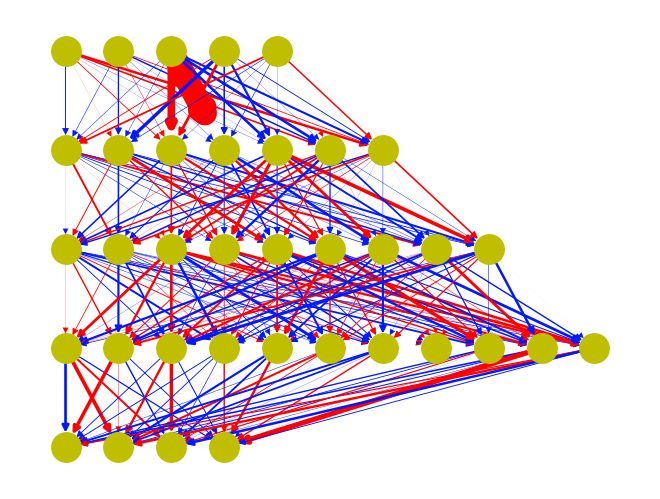

In [30]:
import networkx as nx
import colorsys

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    
show_ann(mlp)

In [31]:
# mlp = MLPClassifier(hidden_layer_sizes=(4),max_iter=500)
mlp = MLPClassifier(hidden_layer_sizes=(9, 5, 7, 10),max_iter=50000)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(9, 5, 7, 10), max_iter=50000)

In [32]:
predictions = mlp.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, predictions, labels=[0, 1, 2, 3])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.60970149 0.42599278 0.48355899 0.72840791]'

'recall = [0.68368201 0.49125729 0.4222973  0.61403509]'

'f-score = [0.64457594 0.45630317 0.45085663 0.66634936]'

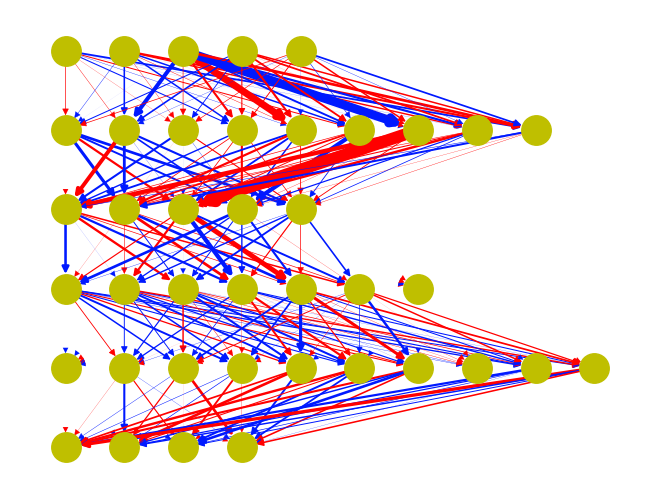

In [33]:
show_ann(mlp)

In [34]:
# mlp = MLPClassifier(hidden_layer_sizes=(6),max_iter=500)
mlp = MLPClassifier(hidden_layer_sizes=(5, 11, 9, 7, 6, 10),max_iter=50000)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(5, 11, 9, 7, 6, 10), max_iter=50000)

In [35]:
predictions = mlp.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, predictions, labels=[0, 1, 2, 3])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.57088123 0.40637141 0.48224852 0.76201641]'

'recall = [0.74811715 0.43547044 0.41300676 0.57017544]'

'f-score = [0.64759145 0.42041801 0.44494995 0.65228299]'

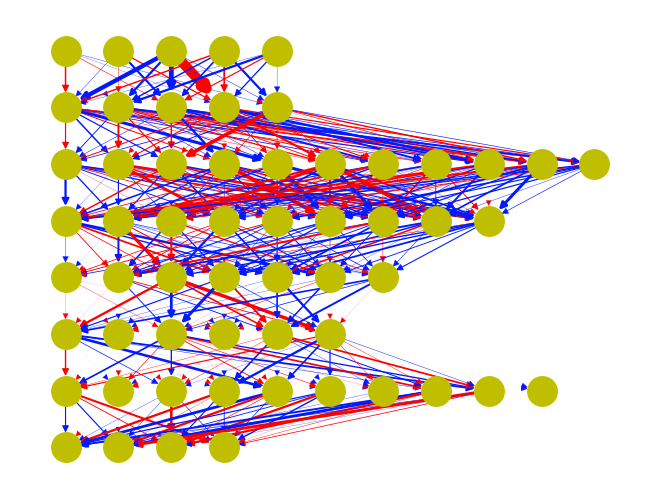

In [36]:
show_ann(mlp)